In [1]:
import pandas as pd

In [13]:
df = pd.read_csv("../../data/steam_reviews.csv")

# Remove rows with missing text
df = df.dropna(subset=["text"])
# print(df.shape)

df.head()

,compensation,date,early_access,found_funny,hours,page,page_order,product_id,products,text,user_id,username
0,NaN,2017-12-17,False,NaN,0.1,1,0,725280,41.0,This would not be acceptable as an entertainme...,NaN,Chaos Syren
1,NaN,2017-12-27,False,NaN,51.1,1,0,328100,769.0,looks like a facebook game,NaN,₮ʜᴇ Wᴀʀᴛᴏɴ
2,Product received for free,2017-10-16,False,2.0,14.6,1,1,328100,2.0,Better than Minecraft,NaN,hello?<
3,NaN,2018-01-04,False,NaN,5.0,1,0,35140,64.0,I love and idolized Batman and this game is Ma...,NaN,Cyderine916
4,NaN,2018-01-04,False,NaN,16.6,1,1,35140,577.0,Still worth playing in 2018.Probably my favori...,7.656120e+16,DarklyThinking


In [ ]:
# Perform Sentiment Analysis on review text, we need to give either positive, neutral or negative sentiment to each review
# We will use TextBlob library for this purpose
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 5 # Positive
    elif analysis.sentiment.polarity == 0:
        return 3 # Neutral
    else:
        return 1 # Negative

df_reviews = df.copy()

# Apply sentiment analysis to each review to create a sudo rating
df_reviews['rating_sentiment'] = df_reviews['text'].apply(get_sentiment)

# Let's see the sentiment distribution in percentage with 2 decimal points
df_reviews['rating_sentiment'].value_counts(normalize=True).mul(100).round(2)

# Save the reviews with sentiment to a new CSV file
df_reviews.to_csv("../../data/adjusted/steam_reviews_sentiment.csv", index=False)

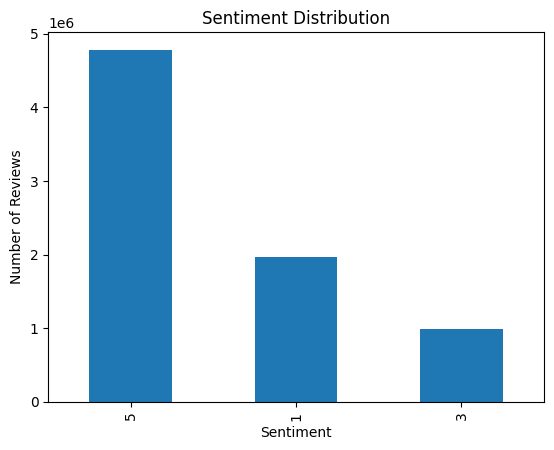

In [15]:
# We can also plot the sentiment distribution
import matplotlib.pyplot as plt

df_reviews['rating_sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution')
plt.show()